
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>



# 4. Übung - Preprocessing, Visualisierung und Clustering

## Abgabe 

Das Jupyter-Notebook und einen PDF-Export in Moodle hochladen.


# Task 1 - Analysiert den folgenden Studierendendatensatz

Zuerst verwenden wir Pandas, um die Daten zu laden

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import utils
import numpy as np
%matplotlib inline

students = pd.read_excel('student_data.xls')
display(students.head())

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13


# Frage 1.1 Was sind der Median, Mean und Mode der Noten, die im Semester FSS2010 vergeben wurden? 

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

- Filtert die Daten nach dem Semester 'FSS2010' und erstellt anschließend ein Histogramm. 
- Berechnet anschließend den Mean, Median und Mode.
- Visualisiert das Ergebnis als Histogram [LINK](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) über die Noten-Häufigkeiten - verwendet so viele Bins, wie es Noten gibt:
    
</div>

Mean: 2.537931034482759
Median: 2.3
Mode: 2.0


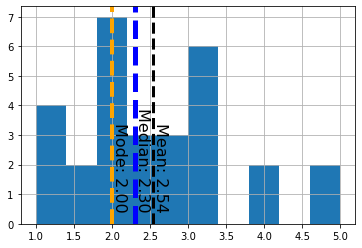

In [2]:
# Selektiert alle Noten aus dem Semester 'FSS2010'
semester = students[students.Semester == 'FSS2010']
marks = semester.Mark

# Berechnet anschließend den Mean, Median und Mode.
mean = marks.mean()
mode = marks.mode()[0]
median = marks.median()

# Visualisiert das Ergebnis als Histogram über die Noten-Häufigkeiten 
# verwendet so viele Bins, wie es Noten gibt

## Ausgabe mittels dieser Hilfsmethode möglich
utils.display_semester(mean, median, mode, marks)

# Antwort auf 1.1:

Mean: 2.537931034482759
Median: 2.3
Mode: 2.0

# Frage 1.2 Besteht im Semester FSS2010 ein sichtbarer Zusammenhang zwischen der Note und der Anzahl an besuchten Veranstaltungen? 

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

- Selektion nach Semester 'FSS2010'
- Erstellt einen Scatter-Plot' [LINK](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) , um die Frage zu beantworten. 
- Verwendet die Attended-Spalte als x-Achse und die Noten-Spalte als y-Achse.
    
</div>

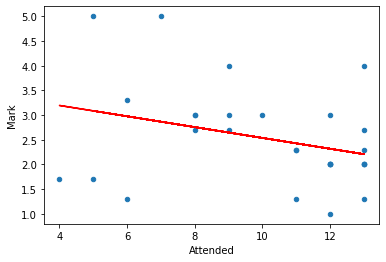

In [3]:
# Erstellt einen Scatter-Plot, um die Frage zu beantworten.
# Verwendet die Attended-Spalte als x-Achse und die Noten-Spalte als y-Achse.
from sklearn.linear_model import LinearRegression

ax = semester.plot.scatter('Attended', 'Mark')
X = semester['Attended'].values.reshape(-1, 1)  
Y = semester['Mark'].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  
ax.plot(X, Y_pred, color="red")

# Antwort auf 1.2:

The relationship between attendance and grade is not obvious. The overall trend tends to be that the more attendance, the better the grades.

# Frage 1.3 Gilt dieser Zusammenhang für alle Studierenden? 


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
    
Berechnet die Durchschnittswerts pro Studierenden im Semester FSS2010 und visualisiert das Ergebnis als Scatter-Plot:

- Selektion nach Semester 'FSS2010'
- Gruppierung (zB mittels Pandas) nach Studierendem und Durchschnittswerte berechnen
- Für diese Gruppierung: Erzeugt Scatter-Plot über Teilnahmen (x-Achse, 'Attended') und Noten (y-Achse, 'Mark')
    
</div>

In [4]:
# Gruppierung nach Studierendem und Durchschnittswerte berechnen
grouping = semester.groupby(semester['Name']).mean()

# Ausgabe
display(grouping)

,Mark,Attended
Name,,
Alex Krausche,1.433333,12.666667
Avid Morvita,3.100000,11.333333
Frank Fester,2.233333,12.666667
Mariano Selina,1.566667,5.000000
Michaela Martke,3.766667,6.333333
Otto Blacher,2.100000,12.333333
Steve Queck,2.800000,8.333333
Susanne Müller,2.433333,12.000000
Tanja Becker,1.650000,11.500000


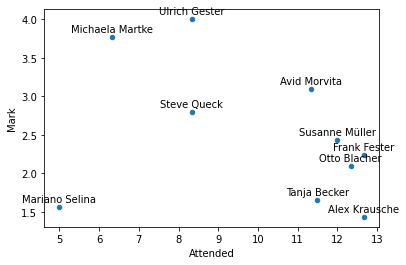

In [5]:
# Für diese Gruppierung
# Erzeuge Scatter-Plot über Teilnahmen (x-Achse, 'Attended') und Noten (y-Achse, 'Mark')

grouping.plot.scatter(x='Attended', y='Mark')
for (name, attended, mark) in zip(grouping.index,
                                  grouping['Attended'].values,
                                  grouping['Mark'].values):
    plt.annotate(name,
                 (attended, mark),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='center')

# Sinnvoll: Annotation jedes Studierenden (Punkt) im Plot

# Antwort auf 1.3:

For most students, the more attendance, the better the grades. But Mariano Selina has the least number of attendances, but her grades are still very good.

# Task 2 Iris-Datensatz (Schwertlilien)

In dem Datensatz existieren 3 Arten:
- Setosa
- Virginica
- Versicolour

Es existieren 4 (non-class) Attribute (Features)
- Sepal width and length
- Petal width and length

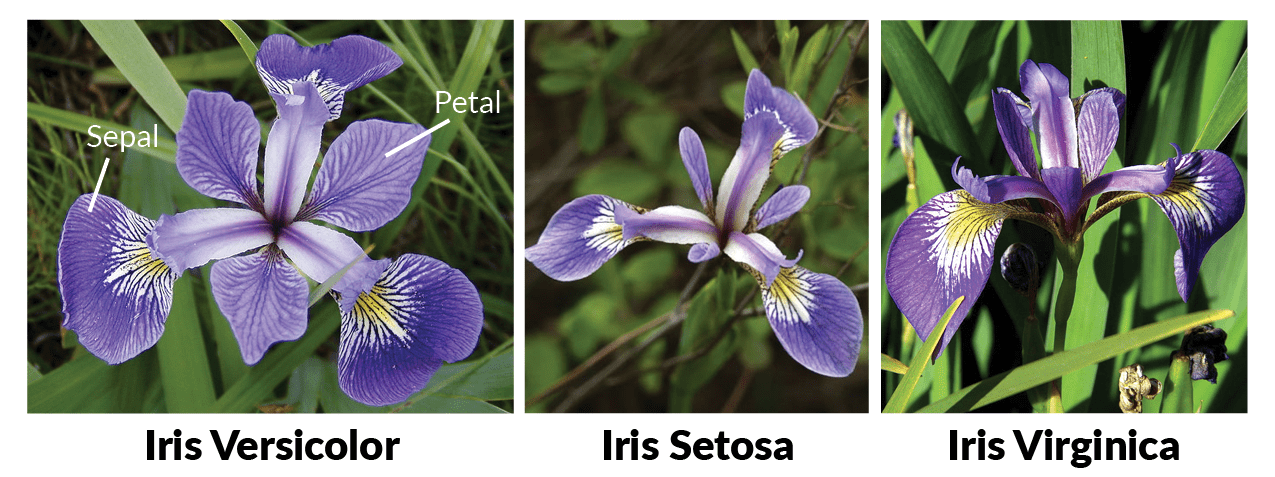

In [6]:
import seaborn as sns
iris = sns.load_dataset("iris")
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Frage 2.1 Welche Attribute und welche Wertebereiche sind gut geeignet, um zwischen der drei Arten zu unterscheiden und warum? 

Wir verwenden Seaborn und insbesondere pairplot um die Verteilungen für alle paare von Attributen übersichtlich darzustellen. 

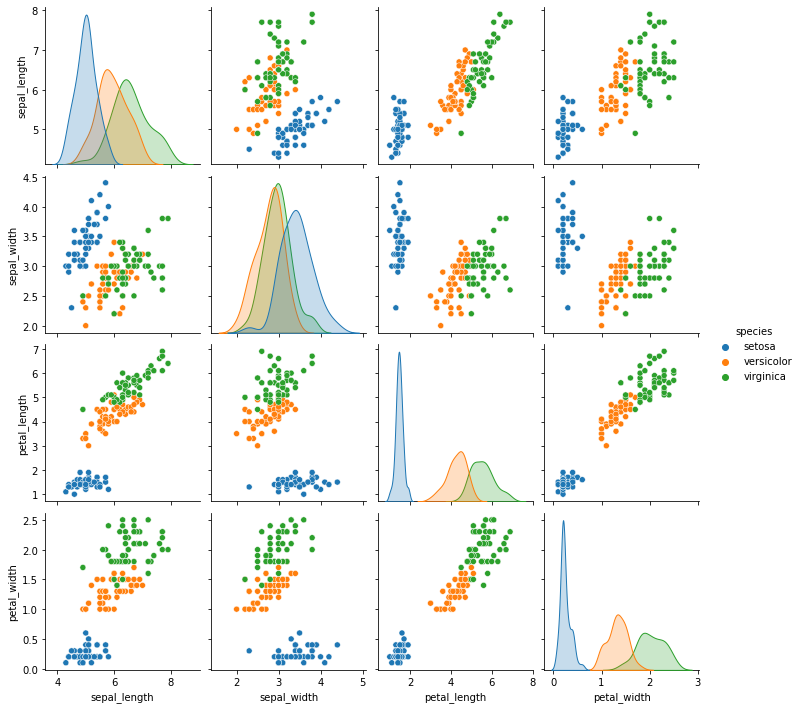

In [7]:
sns.pairplot(iris, hue='species')
plt.show()

In [8]:
iris.groupby('species').agg(['min', 'max'])

sepal_length      sepal_width      petal_length      petal_width  \
                    min  max         min  max          min  max         min   
species                                                                       
setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                 
            max  
species          
setosa      0.6  
versicolor  1.8  
virginica   2.5

# **Antwort auf 2.1: Attribute und Wertebereiche PRO Art**

Setosa: 
peta_length less than 1.9
peta_width less than 0.6

Virginica:
peta_length from 3.0 to 5.1
peta_width from 1.0 to 1.8

Versicolour:
peta_length from 4.5 to 6.9
peta_width from 1.4 to 2.5

# Task 3: Clustern des Iris-Datensatzes

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Experimentiert mit drei verschiedenen Cluster-Agorithmen aus der Vorlesung und verschiedenen Parameter-Kombinationen (KMeans, Agglomeratives Clustern, DBSCAN)
</div>

In [9]:
import seaborn as sns
iris = sns.load_dataset("iris")

# Betrachte nur petal_length und petal_width
iris = iris[['petal_length', 'petal_width']]

# Task 3.1 KMeans

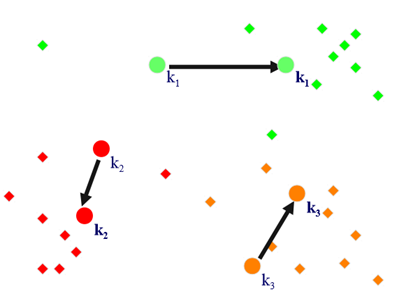

- Siehe auch Dokumentation unter [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Wichtige Parameter sind:
    - ```n_clusters``` (the number of clusters)
- Verwendet die [fit-Funktion](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) um die Cluster zu berechnen. Die Label werden anschließend in ```.labels_``` gespeichert

# Aufgabe 3.1: Welcher KMeans-Parameter funktioniert am besten und warum?

In [10]:
from sklearn.cluster import KMeans
from ipywidgets import interact, interact_manual

@interact_manual
def plot(n_clusters = range(1,5)) :
    
    ## Erstellt einen K-Means Clusterer
    estimator = KMeans(n_clusters=n_clusters, random_state=0).fit(iris)
    
    # Verwendet die Hilfsmethode zur Visualisierung
    utils.plotEstimators(estimator, iris)

interactive(children=(Dropdown(description='n_clusters', options=(1, 2, 3, 4), value=1), Button(description='R…

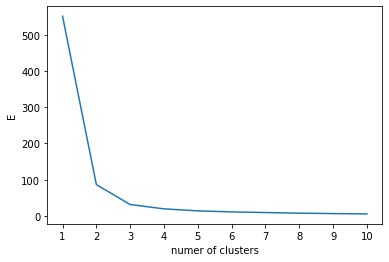

In [11]:
def plot_e(n_clusters = range(1,10)) :
    fig, ax = plt.subplots()
    e = [KMeans(n_clusters=n, random_state=0).fit(iris).inertia_ for n in range(1, 11)]
    ax.set_xticks(range(1, 11))
    ax.set_xlabel("numer of clusters")
    ax.set_ylabel("E")
    ax.plot(range(1,11), e)

plot_e()

# **Antwort 3.1:**

when n=3, the arm bend appears.

# Task 3.2 Agglomeratives Clustern

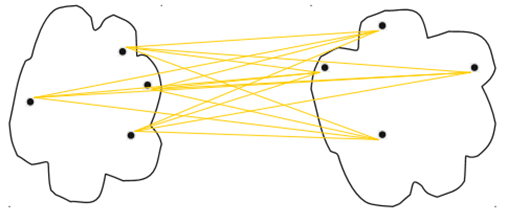

- Siehe auch Dokumentation unter [AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- Wichtige Parameter sind:
    - ```n_clusters``` specifies the number of clusters (i.e., where to cut the hierarchy)
    - ```linkage``` specifies the linkage mode (single, complete, average)
    - ```affinity``` specifies the similarity/distance measure
- Verwendet erneut die ```fit``` Funktion um die Cluster zu berechnen. Die Label werden anschließend in ```.labels_```gespeichert

# Aufgabe 3.2: Welche AgglomerativeClustering-Parameterkombination funktioniert am besten und warum?

In [12]:
from sklearn.cluster import AgglomerativeClustering

@interact_manual
def plot(n_clusters = range(1, 5), # verschiedene Werte testen
         linkage  = ["single", "complete", "average"], # verschiedene Werte testen
         affinity = ["euclidean", "manhattan"] # verschiedene Werte testen
         ) :
    ## Erstellt einen Agglomerativen-Clusterer
    estimator = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity=affinity).fit(iris)

    # Verwendet die Hilfsmethode zur Visualisierung
    utils.plotEstimators(estimator, iris)

interactive(children=(Dropdown(description='n_clusters', options=(1, 2, 3, 4), value=1), Dropdown(description=…

# **Antwort 3.2:**

n_clustuers is 3, linkage is complete or average, affinity is euclidean or manhattan.
if we use single linkage, all points of versicolr and virginica that are closer together will be merged into one cluster because they have "overlapping" parts.

# Task 3.3 DBSCAN

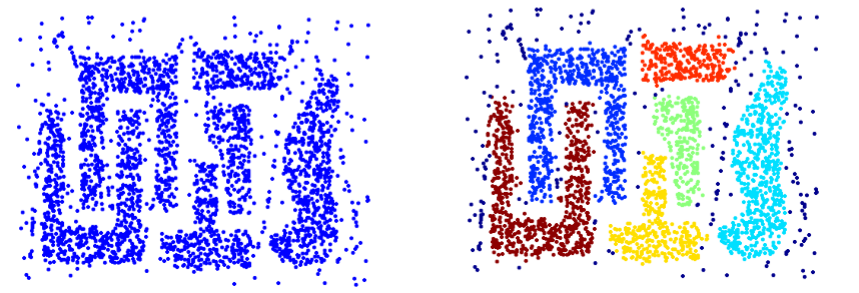

- Siehe auch Dokumentation unter [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- Wichtige Parameter sind:
    - ```min_samples```: The minimum number of points in the neighbourhood for a point to be considered a core point
    - ```eps```: The maximum distance between two points to be considered neighbours
    - ```metric```: The distance function, for example ```'euclidean'```, ```'cosine'```, or ```'manhattan'```
- Verwendet erneut die ```fit``` Funktion um die Cluster zu berechnen. Die Label werden anschließend in ```.labels_``` gespeichert    

# Aufgabe 3.3:  Welche DBSCAN-Parameterkombination funktioniert am besten und warum?

In [13]:
from sklearn.cluster import DBSCAN

@interact_manual
def plot(eps = np.linspace(0.2, 0.4, 10), # verschiedene Werte testen
         min_samples = range(1, 5), # verschiedene Werte testen
         metric = ["euclidean", "manhattan", "cosine"] # verschiedene Werte testen
         ) :

    ## Erstellt einen DBSCAN-Clusterer
    estimator = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(iris)

    # Verwendet die Hilfsmethode zur Visualisierung
    utils.plotEstimators(estimator, iris)


interactive(children=(Dropdown(description='eps', options=(0.2, 0.22222222222222224, 0.24444444444444446, 0.26…

# **Antwort 3.3:**

When epsilon is about from 0.2 to 0.3, min_samples is 2-3, metric is manhattan, the result is better.
Using manhattan distance as the matric method make it easier greater than epsilon, so that it can produce more cluster than using euclidean distance.

# Aufgabe 3.4: Welches Verfahren funktioniert somit am besten auf diesem Datensatz und warum?
# Antwort 3.4:

K-Means and AgglomerativeClustering get similar results. They all work fine, because there are not many noises and outliers, and the size of clusters are almost same.
However the DBSCAN works very bad, it can't discover enough clusters because some parts of some spieces's data are overlapping, they are too close, so that an object belonging to a cluster can also be density reachable from the point in other clusters.